In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
X = np.random.randint(25, 50, (25, 2)).astype(np.float32) # 이렇게 해주면, 더 효율적이다. np.float32(x) 해주는 것보다 좋다.
Y = np.random.randint(60, 85, (25, 2)).astype(np.float32)
Z = np.vstack((X, Y))

In [7]:
Z.shape

(50, 2)

In [32]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [30]:
cv2.KMEANS_RANDOM_CENTERS

0

In [52]:
ret, label, center = cv2.kmeans(Z, 2, # 2개의 클러스터
                                None, 
                                (0, 10, 1.0), # 앞의 값 0, 1, 2을 바꿔가면서 넣어보니 별 차이가 없다. 종료조건이다.
                                10, # 10번 돌렸다.
                                cv2.KMEANS_RANDOM_CENTERS) # 초기값 잡는 방법

In [51]:
print(ret)
print(label)
print(center)

4927.28005027771
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[36.96 38.28]
 [70.92 73.32]]


kmeans 이론적으로 계속 이터레이션 하면 수렴한다고 배웠다. 

In [53]:
[i for i in dir(cv2) if i.startswith('KMEAN')] # -1이 나오면 아무것도 처리하지 말라는 것이고, 0, 1, 2 나오면 3가지 옵션이 있다는 뜻.

['KMEANS_PP_CENTERS', 'KMEANS_RANDOM_CENTERS', 'KMEANS_USE_INITIAL_LABELS']

In [24]:
cv2.TERM_CRITERIA_MAX_ITER # 1
cv2.TERM_CRITERIA_EPS # 2
cv2.TERM_CRITERIA_COUNT # 1

1

상수값 확인해보니 지멋대로이다. 중요한거 아니다.

kmeans는 어떨때 쓸까?? 현실세계에서는 타켓값이 없는 경우가 너무 많다. 그러면 클러스터를 해서 그 클러스터에 속하는 애들을 값을 주는 것이다. gen의 경우는 셀프 슈퍼바이즈드 러닝이라고 한다. 스스로 오토 인코더로 라벨을 붙여준다고 한다.

제일 첫 번째 문제점은 k의 개수를 모른다는 것이다. 그래서 나온 것이 divi scan이다. 조건을 주면 가장 최고의 클러스터를 찾아준다.



# iris 데이터 실습

In [54]:
from sklearn.datasets import load_iris

data = load_iris()

In [55]:
from sklearn.cluster import KMeans, DBSCAN

dbs = DBSCAN()

In [56]:
import mglearn

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


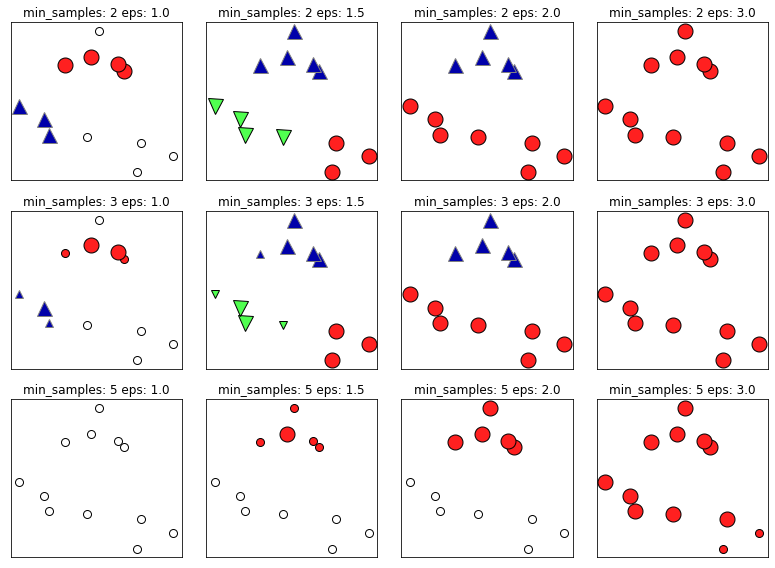

In [60]:
mglearn.plot_dbscan.plot_dbscan()

어떤 동그라미가 돌아가면서, 자기 안에 들어가는 애들을 정해서 개수를 정해준다. eps(엡실론)은 반지름이라고 해도 되고, 민 샘플은 클러스터 안에 들어가는 원소 개수임. 5라면 클러스터 안에 5개만 들어가도 클러스터로 인정한다는 뜻이다.

In [64]:
dbs = DBSCAN(min_samples=10)
dbs.fit_predict(data.data)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

이런식으로 k의 값을 잡아내서 kmeans에 활용하는 것이다. db 스캔을 이용해서, 라벨까지 메길수 있다.

In [66]:
kme = KMeans(3) # kmeans는 opencv로 하는 것이 안 좋다. 시스템화하기 좋기 때문에, 오픈 시비를 쓰는 것이다. 정확도는 한 2, 3% 차이 난다.

In [68]:
kme.fit_predict(data.data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

★★★ 공부해야 할 것: DBSCAN... 공부해야 자동으로 k값을 잘 알아낼 수 있다.

kmeans는 거리기반이라서, 아웃라이어에 민감하다. 그래서 노말라이제이션 해주는게 중요하다. 그래서 민맥스보다는 standard 스케일러를 쓴다.

오픈cv로 영상처리도 되지만, 기억해야 할 것은 전처리 하는 것. 이건 기억해야 한다.

# 넘파이 어레이 vs 매트릭스

In [70]:
a = np.array([[1, 2], [3, 4]])
b = np.matrix([[1, 2], [3, 4]])

In [71]:
a*a # element wise 방식

array([[ 1,  4],
       [ 9, 16]])

In [72]:
b*b # 행렬곱

matrix([[ 7, 10],
        [15, 22]])

 - outlier detection할 때, SVM을 쓴다.
 - 오버피팅: 일반화와 관련되어 있다. svm은 대표성이 좋다.

In [85]:
svm = cv2.ml.SVM_create()
# dir(cv2.ml)
[i for i in dir(svm) if i.startswith('set')]

['setC',
 'setClassWeights',
 'setCoef0',
 'setDegree',
 'setGamma',
 'setKernel',
 'setNu',
 'setP',
 'setTermCriteria',
 'setType']

# 사이킷런

오픈시브이는 한글 안되지만, 시스템 만드는데 효과적이라서 쓴다.

In [86]:
# from scipy.ndimage import 

In [90]:
import imutils

In [92]:
import imageio # 넘파이를 상속받아서 만들었다. 이미지에 관련된 애들을 추가시킨 것이다.

In [95]:
dir(imageio)

['RETURN_BYTES',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'core',
 'formats',
 'get_reader',
 'get_writer',
 'help',
 'imread',
 'imsave',
 'imwrite',
 'mimread',
 'mimsave',
 'mimwrite',
 'mvolread',
 'mvolsave',
 'mvolwrite',
 'plugins',
 'read',
 'save',
 'show_formats',
 'volread',
 'volsave',
 'volwrite']

 - imageio
 - opencv를 편하게 해주는건 imutil

In [100]:
skimage.lookfor('contour') # 사이킷이미지는 이런식으로 검색한다.

Search results for 'contour'
----------------------------
skimage.measure.find_contours
    Find iso-valued contours in a 2D array for a given level value.
skimage.segmentation.active_contour
    Active contour model.
skimage.segmentation.chan_vese
    Chan-Vese segmentation algorithm.
skimage.segmentation.morphological_chan_vese
    Morphological Active Contours without Edges (MorphACWE)
skimage.segmentation.morphological_geodesic_active_contour
    Morphological Geodesic Active Contours (MorphGAC).
skimage.measure.perimeter
    Calculate total perimeter of all objects in binary image.
skimage.measure.regionprops
    Measure properties of labeled image regions.
skimage.measure.marching_cubes_classic
    Classic marching cubes algorithm to find surfaces in 3d volumetric data.
skimage.measure.marching_cubes_lewiner
    Lewiner marching cubes algorithm to find surfaces in 3d volumetric data.
skimage.segmentation.inverse_gaussian_gradient
    Inverse of gradient magnitude.

In [102]:
import numpy as np

np.lookfor('contour') # 넘파이에도 룩포가 있다.
np.info('contour')

Search results for 'contour'
----------------------------
numpy.meshgrid
    Return coordinate matrices from coordinate vectors.
Help for contour not found.


In [104]:
np.info(skimage.measure.find_contours) # 사이킷 이미지는 넘파이로 만들었기 때문에, 넘파이 룩포를 찾아준다.

 find_contours(array, level, fully_connected='low',
               positive_orientation='low')

Find iso-valued contours in a 2D array for a given level value.

Uses the "marching squares" method to compute a the iso-valued contours of
the input 2D array for a particular level value. Array values are linearly
interpolated to provide better precision for the output contours.

Parameters
----------
array : 2D ndarray of double
    Input data in which to find contours.
level : float
    Value along which to find contours in the array.
fully_connected : str, {'low', 'high'}
     Indicates whether array elements below the given level value are to be
     considered fully-connected (and hence elements above the value will
     only be face connected), or vice-versa. (See notes below for details.)
positive_orientation : either 'low' or 'high'
     Indicates whether the output contours will produce positively-oriented
     polygons around islands of low- or high-valued elements. If 'low' then


In [105]:
from skimage import io

In [107]:
dir(io) # 불러오고 저장하고 등 다 io에 있다.

['ImageCollection',
 'MultiImage',
 'WRAP_LEN',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_format_plugin_info_table',
 '_image_stack',
 '_io',
 '_plugins',
 '_separator',
 '_update_doc',
 'available_plugins',
 'call_plugin',
 'collection',
 'concatenate_images',
 'find_available_plugins',
 'image_stack',
 'imread',
 'imread_collection',
 'imread_collection_wrapper',
 'imsave',
 'imshow',
 'imshow_collection',
 'load_sift',
 'load_surf',
 'manage_plugins',
 'plugin_info',
 'plugin_order',
 'pop',
 'push',
 'reset_plugins',
 'setup',
 'show',
 'sift',
 'use_plugin',
 'util']

In [113]:
img = io.imread('D:/hammer_2.png')

In [114]:
img.shape

(512, 512, 4)

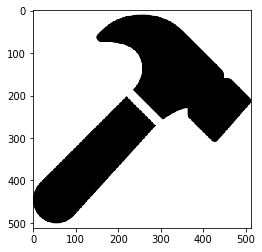

In [116]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [123]:
a, b, c, d = img[:, :, 0], img[:, :, 1], img[:, :, 2], img[:, :, 3]

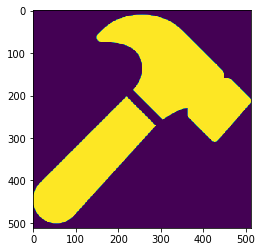

In [132]:
plt.imshow(d) # 네번째에 있다.

In [184]:
cv_img = cv2.imread('C:/aaa.png')

In [158]:
cv2.COLOR_RGBA2BGR

3

In [190]:
cv_img2 = cv2.cvtColor(cv_img, cv2.COLOR_RGBA2BGR)

In [191]:
cv_img2.shape

(217, 194, 3)

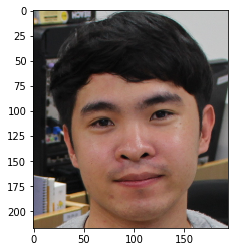

In [192]:
plt.imshow(cv_img2)

In [196]:
from skimage import data, data_dir
dir(data_dir) # string하고 비슷하다.

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


In [202]:
data_dir # 연습용 데이터가 있다.

'C:\\Users\\white\\Anaconda3\\envs\\tf2.0-gpu\\lib\\site-packages\\skimage\\data'

사이킷 이미지는 갤러리 가서 공부하는 것이다.

In [ ]:
# from skimage.color import 

사이킷 이미지의 필터는 데코레이터를 이용해서 할 수 있다.